In [1]:
import numpy as np
import pandas as pd


In [2]:
def create_vocabulary(documents):
    vocabulary = set()
    for document in documents:
        vocabulary.update(document.split())
    return sorted(list(vocabulary))

def vectorize_document(document, vocabulary):
    vector = np.zeros(len(vocabulary))
    for i, term in enumerate(vocabulary):
        vector[i] = document.split().count(term)
    return vector

def cosine_similarity(vector1, vector2):
    # Compute cosine similarity between two vectors
    dot_product = np.dot(vector1, vector2)
    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)
    similarity = dot_product / (norm1 * norm2)
    return similarity

def calculate_similarity_matrix(documents, vocabulary):
    num_documents = len(documents)
    similarity_matrix = np.zeros((num_documents, num_documents))

    # Calculate cosine similarity for each pair
    for i in range(num_documents):
        for j in range(num_documents):
            similarity_matrix[i][j] = cosine_similarity(documents[i], documents[j])
    return similarity_matrix

In [3]:
# Step 1: Define the list of documents
documents = [
    "As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead.",
    "Spring brings not only blooming flowers but also the anticipation of sunny days and outdoor activities.",
    "With the arrival of spring, people begin planning their summer vacations, eager to enjoy the seasonal warmth.",
    "The mild spring weather marks the transition from the cold winter to the inviting warmth of summer.",
    "During spring, families often start spending more time outdoors, enjoying the season's pleasant temperatures and the promise of summer fun.",
    "Summer continues the season's trend of growth and warmth, with gardens full of life and days filled with sunlight.",
    "The summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring.",
    "As summer arrives, the warm weather invites a continuation of the outdoor activities that people began enjoying in spring.",
    "The transition into summer brings even warmer temperatures, allowing for beach visits and swimming, much awaited since the spring.",
    "Summer vacations are often planned as the days grow longer, a pattern that starts in the spring, culminating in peak summer leisure."


]

# Step 2: Create vocabulary
vocabulary = ['a', 'and', 'dress', 'earrings', 'has', 'i', 'in', 'is', 'lipstick', 'my', 'new', 'photo', 'red', 'resembles', 'she', 'short', 'stain', 'the', 'tomorrow', 'wear', 'wearing', 'will', 'wine', 'wore']

# Step 3: Vectorize documents
document_vectors = [vectorize_document(doc, vocabulary) for doc in documents]

# Step 4: Calculate similarity matrix
similarity_matrix = calculate_similarity_matrix(document_vectors, vocabulary)

# Create DataFrame for heatmap
df_similarity_matrix = pd.DataFrame(similarity_matrix, columns=range(1, len(documents) + 1), index=range(1, len(documents) + 1))

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

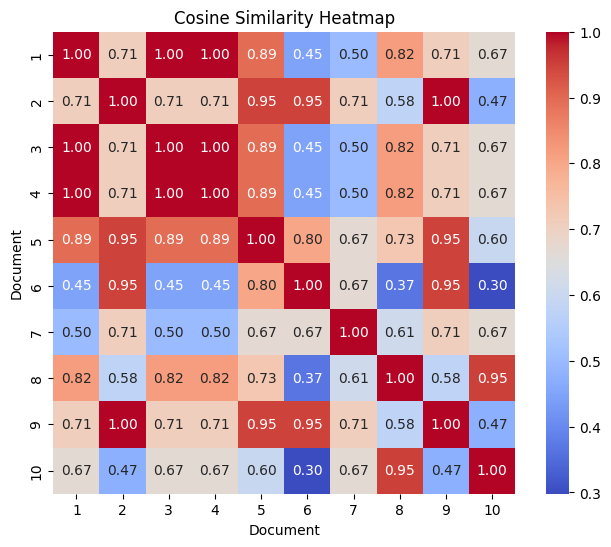

In [5]:
#heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_similarity_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Cosine Similarity Heatmap')
plt.xlabel('Document')
plt.ylabel('Document')
plt.show()